Notebook to show chroma enhancement strategies like CRP

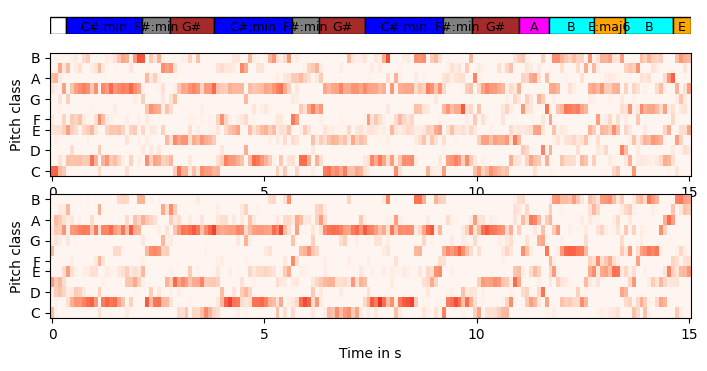

In [3]:
import dataloader
import madmom
import utilities
import features
import librosa
import matplotlib.pyplot as plt
import numpy as np

model_path = [f"/home/max/ET-TI/Masterarbeit/models/ismir2016/chroma_dnn_3.pkl"]
dcp = madmom.audio.chroma.DeepChromaProcessor(fmin=30, fmax=5500, unique_filters=False,models=model_path)
dataset = dataloader.MIRDataset("beatles",basepath="/home/max/ET-TI/Masterarbeit/mirdata/",split_nr=3)
audiopath,gt = dataset["0304"]  # 1206 letitbe, 1208 i've got a feeling,girl  0609, 0304
timevector,sig = utilities.loadAudio(audiopath,t_stop=15)

## baseline chroma
chroma_cq = librosa.feature.chroma_cqt(y=sig, sr=22050,bins_per_octave=12).T
chroma_cq = chroma_cq / np.expand_dims((np.sum(chroma_cq,axis=1)+np.finfo(float).eps),axis=1)
t_chroma_cq = np.linspace(sig.start,sig.stop,chroma_cq.shape[0])
t_chroma_crp,chroma_crp = features.crpChroma(sig,nCRP=55)

fig,ax = plt.subplots(3,1,height_ratios=(1,5,5),figsize=(8.27,4))
utilities.plotChordAnnotations(ax[0],gt,(0,15))
utilities.plotChromagram(ax[1],t_chroma_cq,chroma_cq)

chroma_cq = librosa.feature.chroma_cqt(y=sig, sr=22050,bins_per_octave=36).T
chroma_cq = chroma_cq / np.expand_dims((np.sum(chroma_cq,axis=1)+np.finfo(float).eps),axis=1)
utilities.plotChromagram(ax[1],t_chroma_cq,chroma_cq)

y_harmonic, y_percussive = librosa.effects.hpss(sig)
chroma_cq = librosa.feature.chroma_cqt(y=y_harmonic, sr=22050,bins_per_octave=36).T
chroma_cq = chroma_cq / np.expand_dims((np.sum(chroma_cq,axis=1)+np.finfo(float).eps),axis=1)
#utilities.plotChromagram(ax[3],t_chroma_cq,chroma_cq)
utilities.plotChromagram(ax[2],t_chroma_crp,chroma_crp)
t_chroma_crp,chroma_crp = features.crpChroma(sig,nCRP=55,window=False)
utilities.plotChromagram(ax[1],t_chroma_crp,chroma_crp)